### Regression

In [1]:
import numpy as np
import pandas as pd
import sklearn

In [2]:
print(np.__version__)
print(pd.__version__)
import sys
print(sys.version)
print(sklearn.__version__)

1.26.0
2.0.3
3.9.18 | packaged by conda-forge | (main, Aug 30 2023, 03:40:31) [MSC v.1929 64 bit (AMD64)]
1.3.0


In [3]:
df = pd.read_csv('data//housing.data', delim_whitespace=True, header=None)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
col_name = ['CRIM', 'ZN' , 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [6]:
df.columns = col_name

In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
print(sns.__version__)

0.12.2


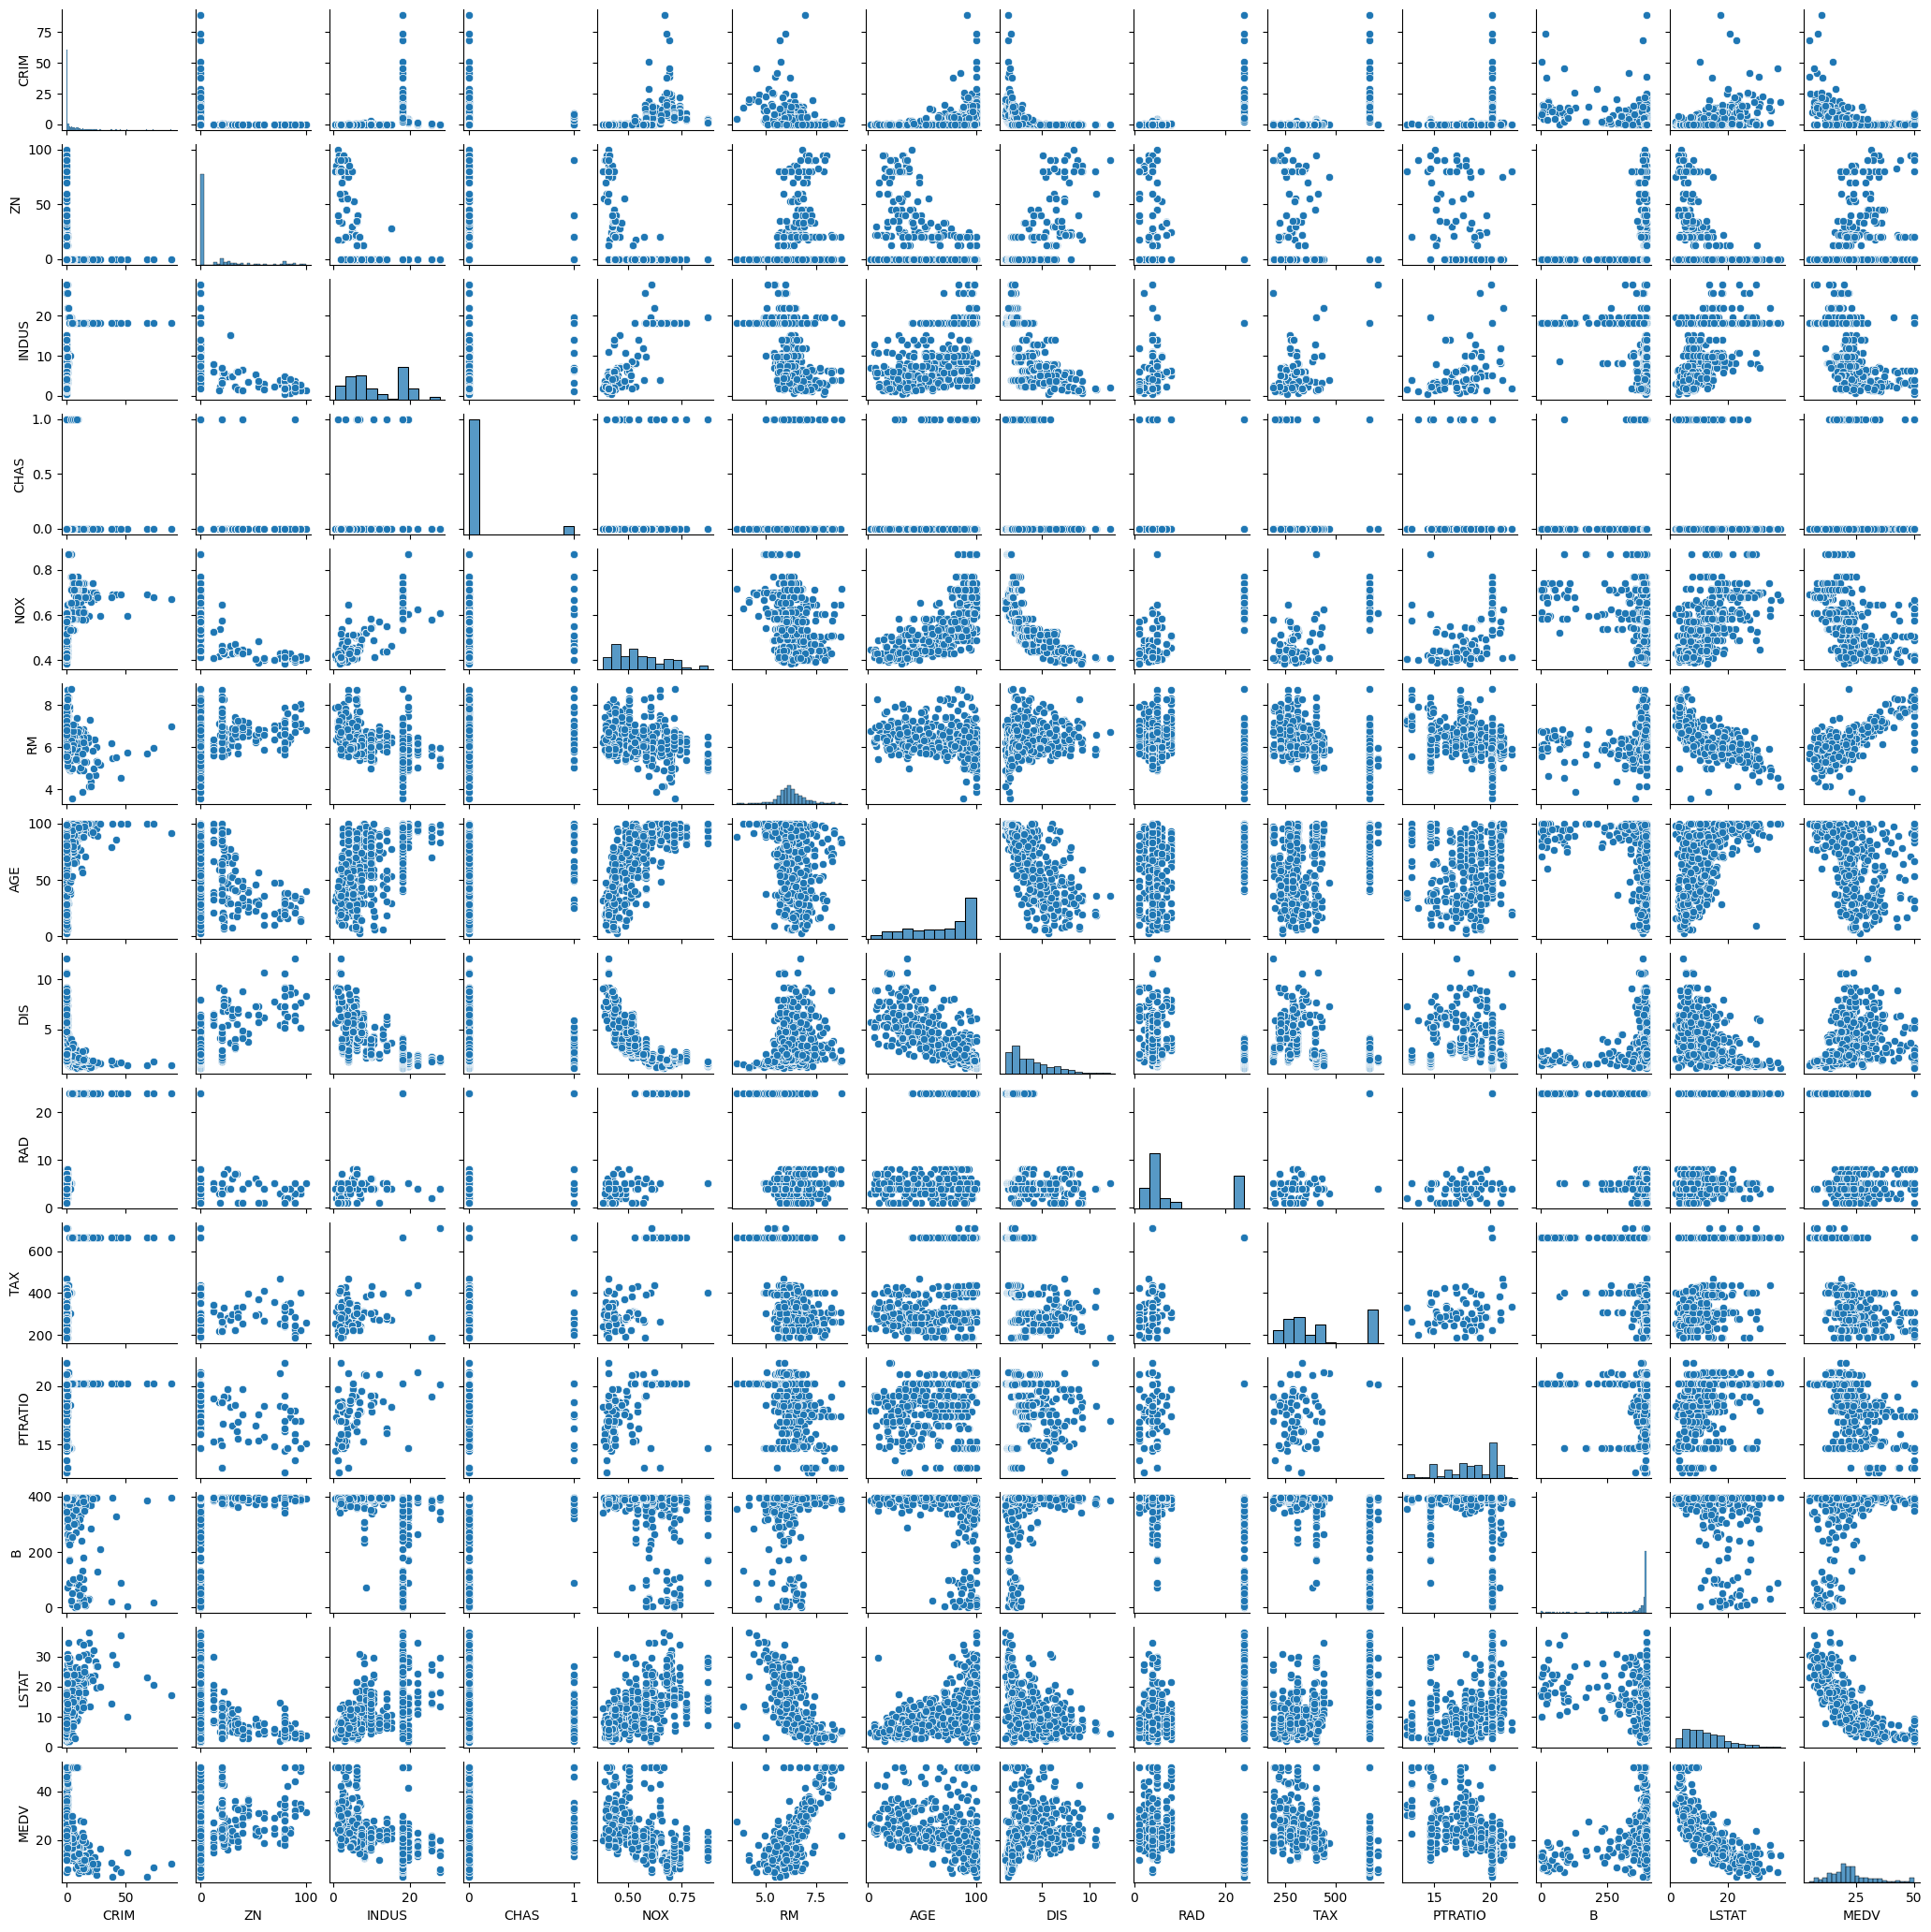

In [9]:
sns.pairplot(df, height=1.5)
plt.show()

In [10]:
col_study = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM']

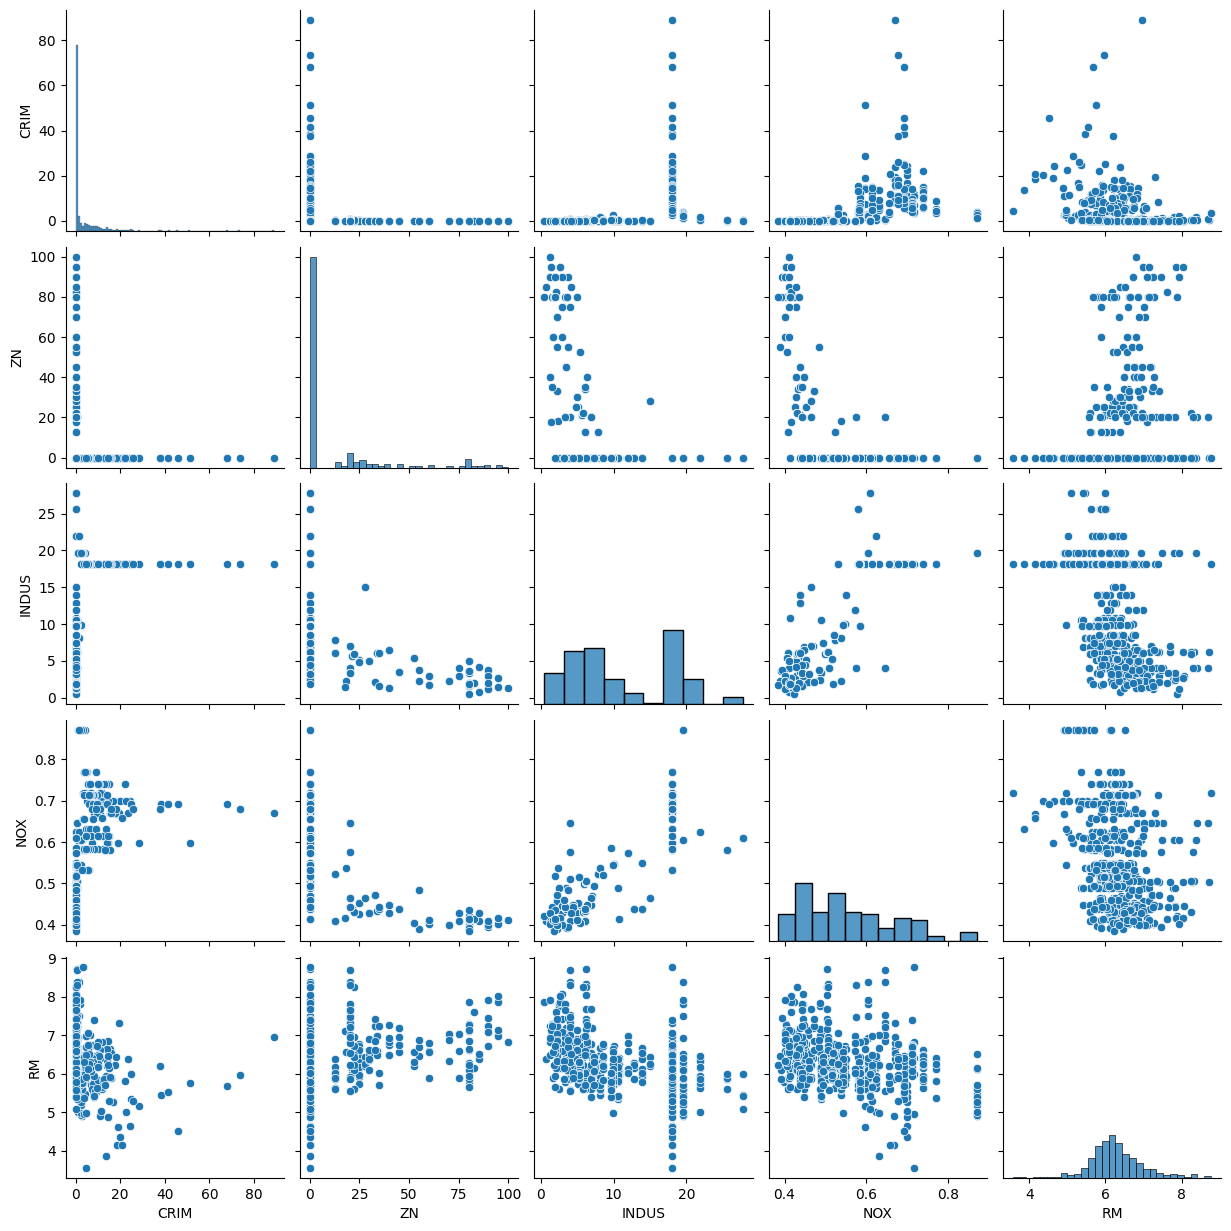

In [11]:
sns.pairplot(df[col_study], height=2.5)
plt.show()

### Phân tích tương quan và lựa chọn tính năng

In [12]:
pd.options.display.float_format = '{:,.2f}'.format

In [13]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


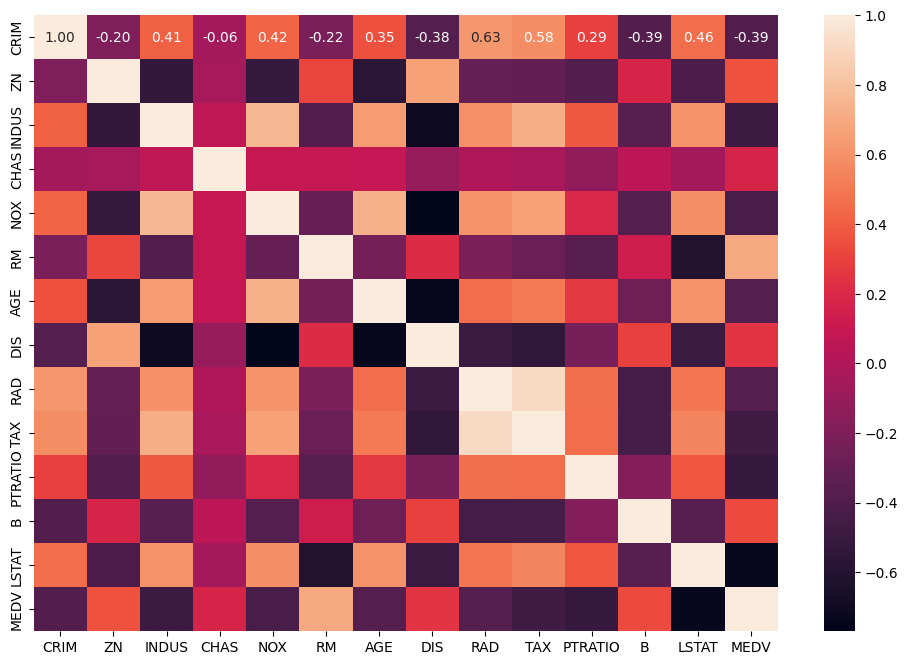

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

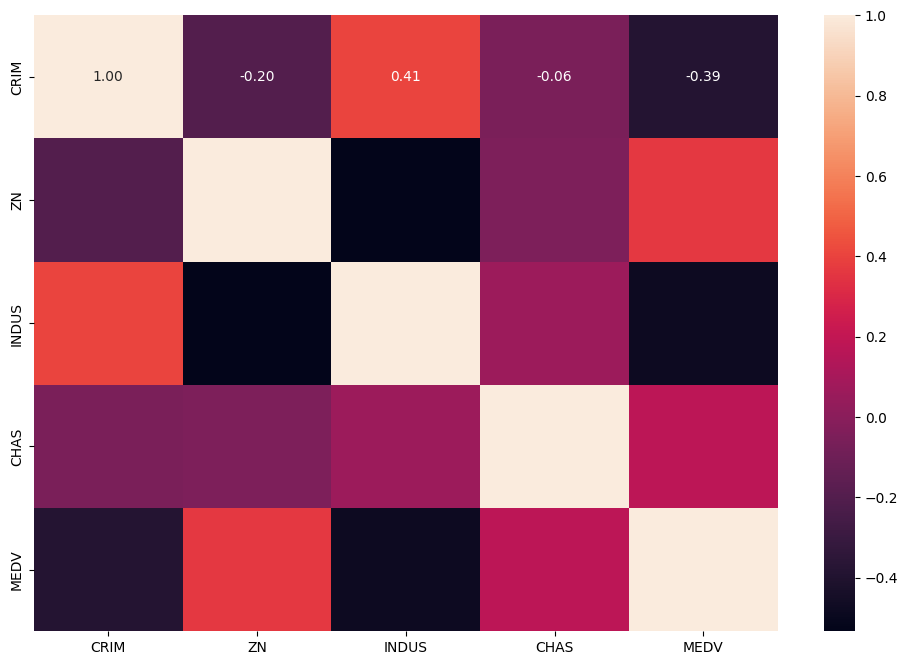

In [15]:
plt.figure(figsize=(12,8))
sns.heatmap(df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'MEDV']].corr(), annot=True, fmt=".2f")
plt.show()

In [16]:
import matplotlib as mpl
print(mpl.__version__)

3.8.0


### Linear Regression with Scikit-Learn

In [17]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.01,18.00,2.31,0,0.54,6.58,65.20,4.09,1,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0,0.47,6.42,78.90,4.97,2,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0,0.47,7.18,61.10,4.97,2,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0,0.46,7.00,45.80,6.06,3,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0,0.46,7.15,54.20,6.06,3,222.00,18.70,396.90,5.33,36.20


In [18]:
X = df['RM'].values.reshape(-1,1)

In [19]:
y = df['MEDV'].values

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
model = LinearRegression()

In [22]:
model.fit(X, y)

LinearRegression()

In [23]:
model.coef_

array([9.10210898])

In [24]:
model.intercept_

-34.670620776438554

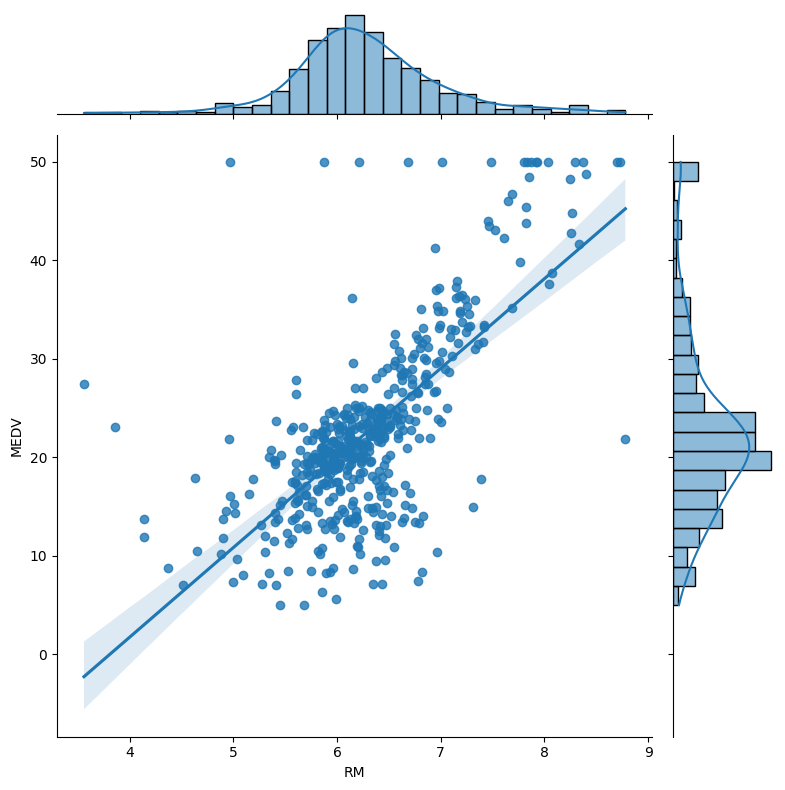

In [25]:
sns.jointplot(x='RM', y='MEDV', data=df, kind='reg', height=8)
plt.show()

In [26]:
model.predict(np.array([7]).reshape(1,-1))

array([29.04414209])

Thông thường nhất, các bước sử dụng API ước tính Scikit-Learn như sau (chúng ta sẽ xem qua một số ví dụ chi tiết trong các phần tiếp theo):

1. Chọn một lớp mô hình bằng cách nhập lớp ước tính thích hợp từ Scikit- learn.
2. Chọn HyperParameter mô hình bằng cách khởi tạo lớp này với các giá trị mong muốn.
3. Sắp xếp dữ liệu thành một ma trận tính năng và vectơ mục tiêu.
4. Lắp mô hình vào dữ liệu của bạn bằng cách gọi phương thức FIT () của thể hiện mô hình.
5. Áp dụng mô hình cho dữ liệu mới:
    * Supervised learning: Thông thường chúng tôi dự đoán các nhãn cho dữ liệu không xác định bằng phương thức predict().
    * Unsupervised learning: Chúng ta thường chuyển đổi hoặc suy ra các thuộc tính của dữ liệu bằng cách sử dụng transform() hoặc predict().

In [27]:
# Step 1: Selecting a model

# Step 2: Instantiation
ml_2 = LinearRegression()

# Step 3: Arrange data
X = df['LSTAT'].values.reshape(-1,1)
y = df['MEDV'].values

# Step 4: Model fitting
ml_2.fit(X, y)

# Step 5: Predict
ml_2.predict(np.array([15]).reshape(1,-1))

array([20.30310057])

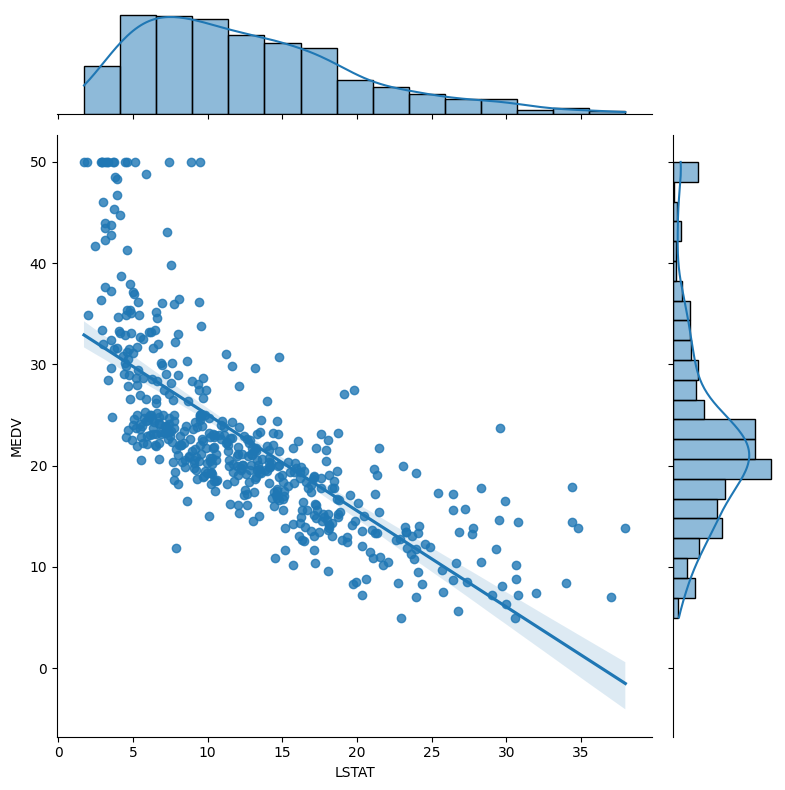

In [28]:
sns.jointplot(x='LSTAT', y='MEDV', data=df, kind='reg', height=8)
plt.show()

# Performance Evaluation of Regression Model

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.01,18.00,2.31,0,0.54,6.58,65.20,4.09,1,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0,0.47,6.42,78.90,4.97,2,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0,0.47,7.18,61.10,4.97,2,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0,0.46,7.00,45.80,6.06,3,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0,0.46,7.15,54.20,6.06,3,222.00,18.70,396.90,5.33,36.20


In [31]:
#X = df['LSTAT'].values.reshape(-1,1)
X = df.iloc[:, :-1].values

In [32]:
y = df['MEDV'].values

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [34]:
lr = LinearRegression()

In [35]:
lr.fit(X_train, y_train)

LinearRegression()

In [36]:
y_train_pred = lr.predict(X_train)

In [37]:
y_test_pred = lr.predict(X_test)

## Method 1: Residual Analysis

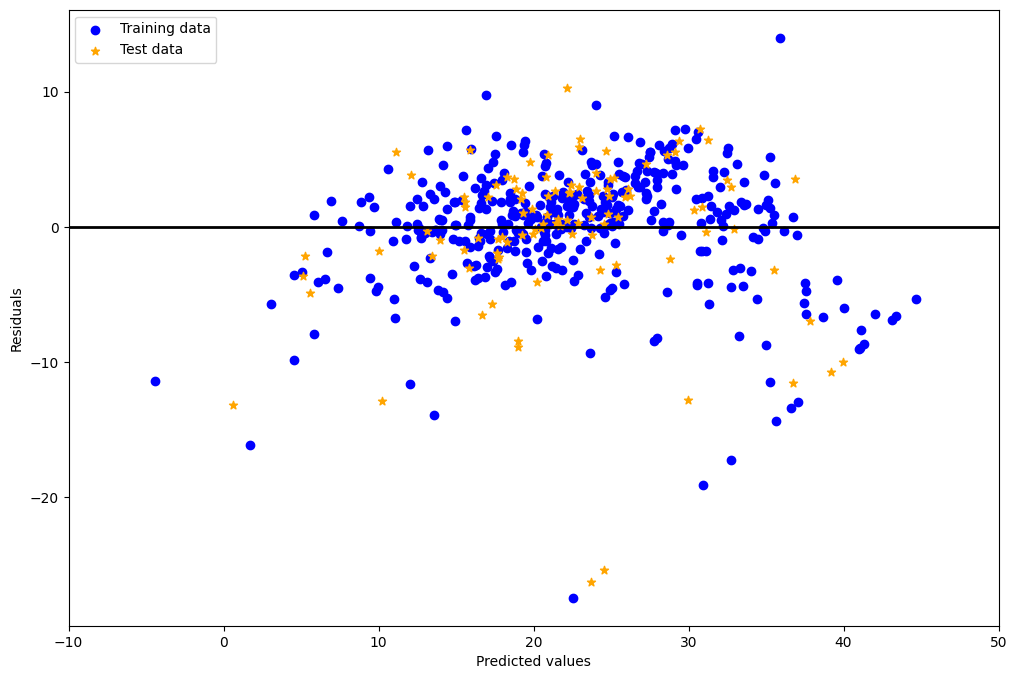

In [38]:
plt.figure(figsize=(12,8))
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='orange', marker='*', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='k')
plt.xlim([-10, 50])
plt.show()

# Method 2: Mean Squared Error (MSE)

$$MSE=\frac{1}{n}\sum^n_{i=1}(y_i-\hat{y}_i)^2$$

* The average value of the Sums of Squared Error cost function  

* Useful for comparing different regression models 

* For tuning parameters via a grid search and cross-validation

In [39]:
from sklearn.metrics import mean_squared_error

In [40]:
mean_squared_error(y_train, y_train_pred)

19.32647020358573

In [41]:
mean_squared_error(y_test, y_test_pred)

33.44897999767661

# Method 3: Coefficient of Determination, $R^2$

$$R^2 = 1 - \frac{SSE}{SST}$$

SSE: Sum of squared errors

SST: Total sum of squares

In [42]:
from sklearn.metrics import r2_score

In [43]:
r2_score(y_train, y_train_pred)

0.7730135569264233

In [44]:
r2_score(y_test, y_test_pred)

0.5892223849182499

# What does a Near Perfect Model Looks like?

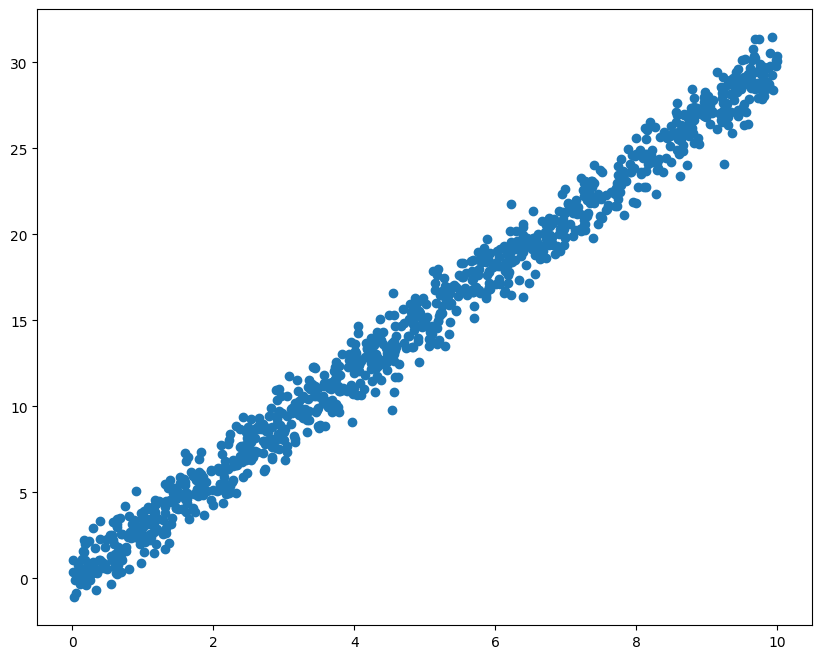

In [45]:
generate_random = np.random.RandomState(0)
x = 10 * generate_random.rand(1000)
y = 3 * x + np.random.randn(1000)
plt.figure(figsize = (10, 8))
plt.scatter(x, y)
plt.show()

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [48]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(X_train.reshape(-1, 1), y_train)


y_train_pred = model.predict(X_train.reshape(-1, 1))
y_test_pred = model.predict(X_test.reshape(-1, 1))

# Method 1: Residual Analysis

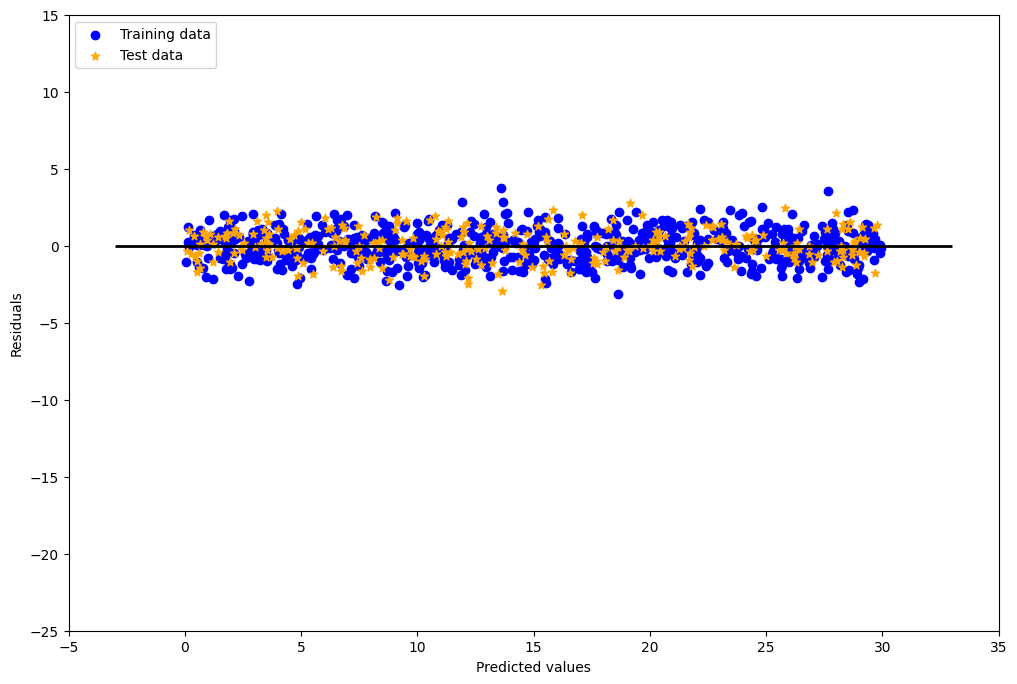

In [49]:
plt.figure(figsize=(12,8))
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='orange', marker='*', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-3, xmax=33, lw=2, color='k')
plt.xlim([-5, 35])
plt.ylim([-25, 15])
plt.show()

# Method 2: Mean Squared Error (MSE)

In [50]:
mean_squared_error(y_train, y_train_pred)

1.0667734305465448

In [51]:
mean_squared_error(y_test, y_test_pred)

0.9690370374067788

# Method 3: Coefficient of Determination, $R^2$

In [52]:
r2_score(y_train, y_train_pred)

0.9859789871113266

In [53]:
r2_score(y_test, y_test_pred)

0.9874425594323661